# SEGUNDO EXÁMEN
## GEOFÍSICA MATEMÁTICA Y COMPUTACIONAL

- Profesor: Luis Miguel de la Cruz Salas
- Alumno: Alan de la Fuente Bonfil

### EJERCICIO 5: ECUACIÓN DE ONDA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
L = 1 # Longitud del dominio
N = 20 # Numero de incognitas internas
Tmax = 1.0 # Tiempo maximo de simulacion
ht = 0.05 # Paso de tiempo
alpha = 2 # Dato fisico
h = L / (N +2) # Tamanio de la malla espacial
Nt = int ( Tmax / ht) # Numero total de pasos
lamb = alpha * ht / h # Parametro lambda
if lamb>1: # condicion de estabilidad
    lamb=1
Tmax = Nt * ht # Tiempo total de simulacion

In [20]:
"""
Función de condición inicial

Parámetros:

x = dominio
pi = pi

return
np. sin (np.pi * x)

"""
def f(x):
    return np. sin (np.pi * x)
"""
Función de velocidad inicial

return
0

"""
def g(x):
    return 0
"""
Función de solución exacta

Parámetros:

x = dominio
t = tiempo

return
np. sin (np.pi * x) * np.cos (2 * np.pi * t)

"""

def solExacta (x, t):
    return np. sin (np.pi * x) * np.cos (2 * np.pi * t)
"""
Función para calcular el error

Parámetros:

sol_n = valores de la solución numérica
sol_e = valores de la solución exacta

return
turn np. abs (sol_n - sol_e)

"""

def calcError (sol_n , sol_e ):
    return np. abs (sol_n - sol_e )
"""
Función para condiciones iniciales

Parámetros:

l = longitud del dominio
N = número de incognitas
u = variable
x = dominio
op = orden

return
w

"""

def condicionesIniciales (l, ht , u, x, op =1):
    N = len (u)
    w = np. zeros (N)
    for i in range (1,N -1):
        if op == 1:
            w[i] = u[i] + ht * g(x[i])
        else :
            w[i] = (1 - l **2) * u[i] + 0.5 * l **2 * (u[i +1] + u[i -1]) + ht * g(x[i])
    return w

"""
Función para obtener la solución numérica

Parámetros:

l = longitud del dominio
N = número de incognitas
u = variable
x = dominio
op = orden

return
s
"""
def solver (u, w, N, x, Nt , l,t):
    s = np. zeros (N+2)
    for n in range (1, Nt ):
        for i in range (1,N +1):
            s[i] = 2 * (1 - l **2) * w[i] + l**2 * (w[i +1] + w[i -1]) - u[i]
        Exa=solExacta(x,t[n])
        u = w.copy()
        w = s.copy()
        if n==1:
            plt.plot(x,Exa,'tab:grey',label='Exacta')
            plt.plot(x,s,'ko',label='Numérica')
        plt.plot(x,Exa,'tab:grey')
        plt . plot (x,s,'ko')
    return s


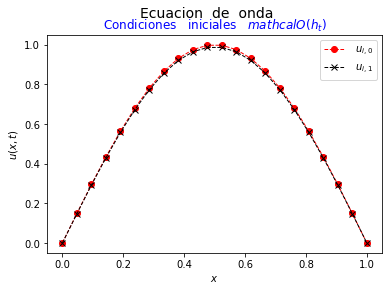

In [21]:
x = np. linspace (0,L,N +2) # Coordenadas de la malla
u = f(x) # Condicion inicial
w = condicionesIniciales (lamb , ht , u, x, op =2) # Euler :op = 1
plt.suptitle ('Ecuacion  de  onda ', fontsize =14)
plt.plot (x, u,'ro--', lw = 1, label = " $u_ {i ,0} $")
plt.plot (x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")
plt.title ('Condiciones   iniciales  $\ mathcal {O}( h_t )$', color ='b', fontsize =12)
plt.ylabel ('$u(x,t)$')
plt.xlabel ('$x$')
plt.legend()
plt.savefig ('condicion_O3.pdf')
plt.show()


## O (ht)

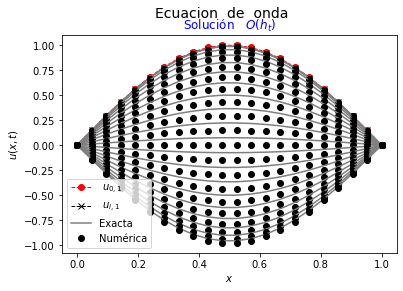

In [22]:
t = np. linspace (0,(Tmax/2), (Nt+2)) #coordenadas de la malla
plt.suptitle ('Ecuacion  de  onda ', fontsize =14)
plt.plot (x, u,'ro--', lw = 1, label = " $u_ {0 ,1} $ ")
plt.plot (x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")
plt.title ('Solución  $\ {O}( h_t )$', color ='b', fontsize =12)
plt.ylabel ('$u(x,t)$')
plt.xlabel ('$x$')
w = condicionesIniciales (lamb , ht , u, x, op = 1) # Euler :op = 1
s = solver (u, w, N, x, Nt , lamb,t ) #Función de solución numérica
plt.legend()
plt.show()

## O (ht^3)

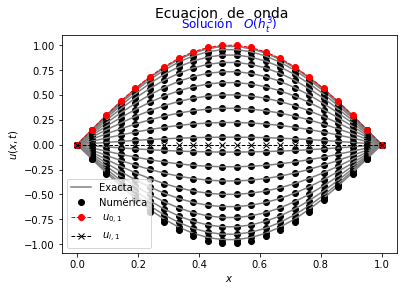

In [23]:
w = condicionesIniciales (lamb , ht , u, x, op = 2) # Euler :op = 1
s = solver (u, w, N, x, Nt , lamb,t )  #Función de solución numérica
w = np.zeros(N+2)
s = np. zeros (N+2)
plt.suptitle ('Ecuacion  de  onda ', fontsize =14)
plt.plot (x, u,'ro--', lw = 1, label = " $u_ {0 ,1} $ ")
plt.plot (x, w,'kx--', lw = 1, label = " $u_ {i ,1} $")
plt.title ('Solución  $\ {O}( h_t^3 )$', color ='b', fontsize =12)
plt.ylabel ('$u(x,t)$')
plt.xlabel ('$x$')
plt.legend()
plt.show()